In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, SimpleRNN, GRU, LSTM, Bidirectional, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("tcc_ceds_music.csv")
df

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.000000
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.000000
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.000000
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.000000
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,82447,mack 10,10 million ways,2019,hip hop,cause fuck leave scar tick tock clock come kno...,78,0.001350,0.001350,0.001350,...,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,obscene,0.014286
28368,82448,m.o.p.,ante up (robbin hoodz theory),2019,hip hop,minks things chain ring braclets yap fame come...,67,0.001284,0.001284,0.035338,...,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,obscene,0.014286
28369,82449,nine,whutcha want?,2019,hip hop,get ban get ban stick crack relax plan attack ...,77,0.001504,0.154302,0.168988,...,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,obscene,0.014286
28370,82450,will smith,switch,2019,hip hop,check check yeah yeah hear thing call switch g...,67,0.001196,0.001196,0.001196,...,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,obscene,0.014286


In [5]:
#remove unneccessary data from dataset
df = df[['lyrics', 'genre']]
df

,lyrics,genre
0,hold time feel break feel untrue convince spea...,pop
1,believe drop rain fall grow believe darkest ni...,pop
2,sweetheart send letter goodbye secret feel bet...,pop
3,kiss lips want stroll charm mambo chacha merin...,pop
4,till darling till matter know till dream live ...,pop
...,...,...
28367,cause fuck leave scar tick tock clock come kno...,hip hop
28368,minks things chain ring braclets yap fame come...,hip hop
28369,get ban get ban stick crack relax plan attack ...,hip hop
28370,check check yeah yeah hear thing call switch g...,hip hop


In [6]:
#train test split
# Splitting the data into features (X) and target (y)
X = df.drop(columns=['genre'])
y = df['genre']

# Performing train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Assuming y_train and y_test are your target variables
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.transform(y_test)

In [8]:
#reference: https://www.tensorflow.org/text/guide/word_embeddings
# Vocabulary size and number of words in a sequence.
vocab_size = 10000
sequence_length = 100

vectorize_layer = TextVectorization(
    max_tokens=vocab_size,
    output_mode='int',
    output_sequence_length=sequence_length)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
vectorize_layer.adapt(X_train)

In [9]:
embedding_dim=16

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  GlobalAveragePooling1D(),
  Dense(16, activation='relu'),
  Dense(7)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    callbacks = [callback])

Epoch 1/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1806 - loss: 0.4770 - val_accuracy: 0.2613 - val_loss: 0.3871
Epoch 2/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2611 - loss: 0.3824 - val_accuracy: 0.2837 - val_loss: 0.3804
Epoch 3/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2931 - loss: 0.3722 - val_accuracy: 0.3360 - val_loss: 0.3691
Epoch 4/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3751 - loss: 0.3552 - val_accuracy: 0.3540 - val_loss: 0.3606
Epoch 5/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4299 - loss: 0.3383 - val_accuracy: 0.3625 - val_loss: 0.3547
Epoch 6/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4577 - loss: 0.3230 - val_accuracy: 0.3741 - val_loss: 0.3548


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 16)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 481,175 (1.84 MB)

 Trainable params: 160,391 (626.53 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 320,784 (1.22 MB)

Trying RNN:

In [13]:
embedding_dim=16

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  GRU(32, return_sequences=True),
  SimpleRNN(16),
  Dense(7)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    callbacks= [callback])

Epoch 1/15


710/710 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.2012 - loss: 0.4528 - val_accuracy: 0.2463 - val_loss: 0.3886
Epoch 2/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.2520 - loss: 0.3865 - val_accuracy: 0.2870 - val_loss: 0.3781
Epoch 3/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.3081 - loss: 0.3669 - val_accuracy: 0.3295 - val_loss: 0.3659
Epoch 4/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.3723 - loss: 0.3500 - val_accuracy: 0.3496 - val_loss: 0.3632
Epoch 5/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 37s 51ms/step - accuracy: 0.4052 - loss: 0.3342 - val_accuracy: 0.3489 - val_loss: 0.3661


In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 100, 32)        │         4,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 16)             │           784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           119 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 497,111 (1.90 MB)

 Trainable params: 165,703 (647.28 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 331,408 (1.26 MB)

178/178 ━━━━━━━━━━━━━━━━━━━━ 9s 53ms/step


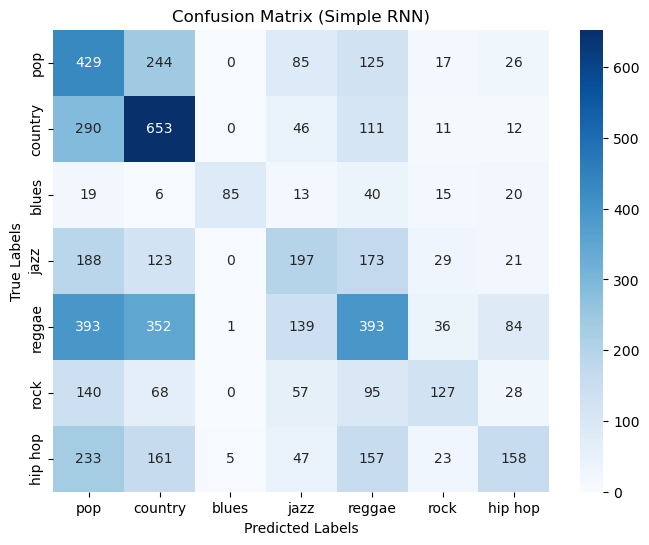

In [35]:
labels = ['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop']

predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Simple RNN)")
plt.show()

LSTM RNN:

In [17]:
embedding_dim=16

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  LSTM(32),
  Dense(7)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    callbacks= [callback])

Epoch 1/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 30s 40ms/step - accuracy: 0.2268 - loss: 0.4241 - val_accuracy: 0.2442 - val_loss: 0.3883
Epoch 2/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.2454 - loss: 0.3864 - val_accuracy: 0.2633 - val_loss: 0.3850
Epoch 3/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.2794 - loss: 0.3763 - val_accuracy: 0.3149 - val_loss: 0.3702
Epoch 4/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 31s 43ms/step - accuracy: 0.3378 - loss: 0.3580 - val_accuracy: 0.3343 - val_loss: 0.3670
Epoch 5/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - accuracy: 0.3787 - loss: 0.3448 - val_accuracy: 0.3503 - val_loss: 0.3650
Epoch 6/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.4243 - loss: 0.3299 - val_accuracy: 0.3408 - val_loss: 0.3722


In [20]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 499,511 (1.91 MB)

 Trainable params: 166,503 (650.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 333,008 (1.27 MB)

178/178 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step


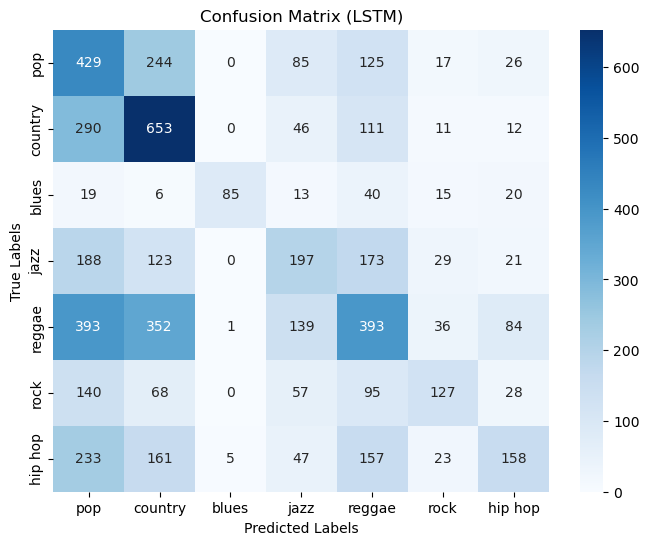

In [32]:
labels = ['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop']

predictions_lstm = model.predict(X_test)
predicted_labels_lstm = np.argmax(predictions_lstm, axis=1)

true_labels_lstm = np.argmax(y_test, axis=1)

conf_matrix_lstm = confusion_matrix(true_labels_lstm, predicted_labels_lstm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lstm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (LSTM)")
plt.show()

Bidirectional:

In [21]:
embedding_dim=16

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  Bidirectional(LSTM(32, return_sequences=True), input_shape=(5,7)),
  Bidirectional(LSTM(16)),
  Dense(7)
])

/Users/habibasalman/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=0,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    callbacks= [callback])

Epoch 1/15


710/710 ━━━━━━━━━━━━━━━━━━━━ 65s 81ms/step - accuracy: 0.2317 - loss: 0.4202 - val_accuracy: 0.2377 - val_loss: 0.3889
Epoch 2/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 44s 63ms/step - accuracy: 0.2640 - loss: 0.3821 - val_accuracy: 0.2900 - val_loss: 0.3746
Epoch 3/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 44s 62ms/step - accuracy: 0.3479 - loss: 0.3580 - val_accuracy: 0.3471 - val_loss: 0.3618
Epoch 4/15
710/710 ━━━━━━━━━━━━━━━━━━━━ 47s 66ms/step - accuracy: 0.4371 - loss: 0.3301 - val_accuracy: 0.3579 - val_loss: 0.3620


In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 16)        │       160,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 64)        │        12,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 32)             │        10,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 549,431 (2.10 MB)

 Trainable params: 183,143 (715.40 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 366,288 (1.40 MB)

178/178 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step


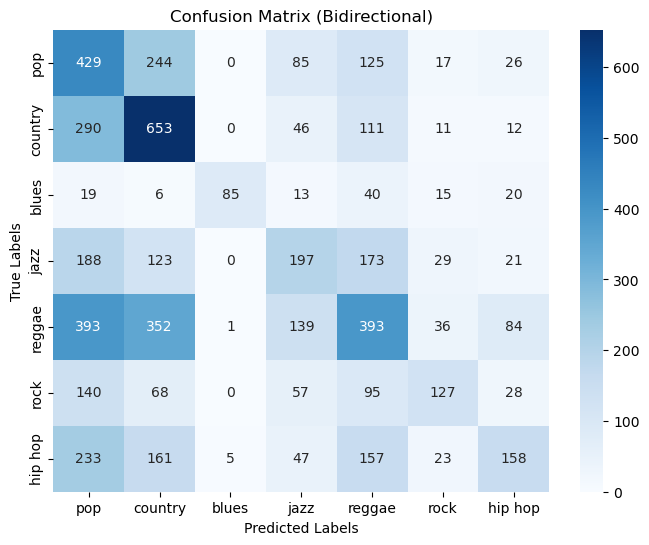

In [34]:
labels = ['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop']

predictions_lstm = model.predict(X_test)
predicted_labels_lstm = np.argmax(predictions_lstm, axis=1)

true_labels_lstm = np.argmax(y_test, axis=1)

conf_matrix_lstm = confusion_matrix(true_labels_lstm, predicted_labels_lstm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lstm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Bidirectional)")
plt.show()

Test with different params:

In [25]:
embedding_dim=100

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  Bidirectional(LSTM(128, return_sequences=True)),
  Dropout(.5),
  Bidirectional(LSTM(64)),
  BatchNormalization(),
  Dense(64, activation="relu"),
  Dropout(.5),
  Dense(7, activation="softmax")
])

In [26]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [27]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop after 3 epochs if no improvement
    restore_best_weights=True
)

model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks= [callback])

Epoch 1/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 141s 189ms/step - accuracy: 0.2432 - loss: 1.8317 - val_accuracy: 0.2569 - val_loss: 2.0190
Epoch 2/50
632/710 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - accuracy: 0.3769 - loss: 1.5928

KeyboardInterrupt: 

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 100)       │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 100, 256)       │       234,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 128)            │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,223,703 (16.11 MB)

 Trainable params: 1,407,815 (5.37 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 2,815,632 (10.74 MB)

Do hyperparameter optimization

In [ ]:
from tensorflow import keras
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential([
        vectorize_layer,
        Embedding(vocab_size, hp.Int('embedding_dim', min_value=32, max_value=256, step=32), name="embedding"),
        Bidirectional(LSTM(hp.Int('units_1', min_value=32, max_value=256, step=32), return_sequences=True)),
        Dropout(hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)),
        Bidirectional(LSTM(hp.Int('units_2', min_value=32, max_value=256, step=32))),
        BatchNormalization(),
        Dense(hp.Int('units_3', min_value=32, max_value=256, step=32), activation="relu"),
        Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(7, activation="softmax")
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

C:\Users\Nevin\AppData\Local\Temp\ipykernel_21156\2861290751.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop after 3 epochs if no improvement
    restore_best_weights=True
)

# Define tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='text_classification')

# Start the search for the best hyperparameter configuration
tuner.search(X_train, y_train,
             validation_data=(X_test, y_test),
             epochs=50,
             callbacks=[callback])

# Get the best hyperparameters
# best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 10 Complete [00h 40m 41s]
val_accuracy: 0.34140968322753906

Best val_accuracy So Far: 0.35885462164878845
Total elapsed time: 06h 42m 23s


In [ ]:
# print(best_hps.values)

{'embedding_dim': 224, 'units_1': 32, 'dropout_1': 0.2, 'units_2': 64, 'units_3': 224, 'dropout_2': 0.2}


Run with new hyperparameters:
{'embedding_dim': 224, 'units_1': 32, 'dropout_1': 0.2, 'units_2': 64, 'units_3': 224, 'dropout_2': 0.2}

In [ ]:
embedding_dim=224

model = Sequential([
  vectorize_layer,
  Embedding(vocab_size, embedding_dim, name="embedding"),
  Bidirectional(LSTM(32, return_sequences=True)),
  Dropout(.2),
  Bidirectional(LSTM(64)),
  BatchNormalization(),
  Dense(224, activation="relu"),
  Dropout(.2),
  Dense(7, activation="softmax")
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,  # Stop after 3 epochs if no improvement
    restore_best_weights=True
)

model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks= [callback])

Epoch 1/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 744s 1s/step - accuracy: 0.2750 - loss: 1.7652 - val_accuracy: 0.3381 - val_loss: 1.6885
Epoch 2/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 47s 66ms/step - accuracy: 0.4571 - loss: 1.4206 - val_accuracy: 0.3239 - val_loss: 2.0978
Epoch 3/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 71s 99ms/step - accuracy: 0.5718 - loss: 1.1505 - val_accuracy: 0.3609 - val_loss: 1.8098
Epoch 4/50
710/710 ━━━━━━━━━━━━━━━━━━━━ 99s 139ms/step - accuracy: 0.6775 - loss: 0.8815 - val_accuracy: 0.3350 - val_loss: 2.1807


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization              │ (None, 100)            │             0 │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 100, 224)       │     2,240,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 100, 64)        │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 224)            │        28,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 224)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,575 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,207,959 (27.50 MB)

 Trainable params: 2,402,567 (9.17 MB)

 Non-trainable params: 256 (1.00 KB)

 Optimizer params: 4,805,136 (18.33 MB)